In [3]:
# Import our dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Imports for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import set_config

In [4]:
# import our input datasets
df_atl = pd.read_csv('../data/table_ATL.csv')
df_bos = pd.read_csv('../data/table_BOS.csv')
df_cha = pd.read_csv('../data/table_CHA.csv')
df_chi = pd.read_csv('../data/table_CHI.csv')
df_cle = pd.read_csv('../data/table_CLE.csv')
df_dal = pd.read_csv('../data/table_DAL.csv')
df_den = pd.read_csv('../data/table_DEN.csv')
df_det = pd.read_csv('../data/table_DET.csv')
df_gsw = pd.read_csv('../data/table_GSW.csv')
df_hou = pd.read_csv('../data/table_HOU.csv')
df_ind = pd.read_csv('../data/table_IND.csv')
df_lac = pd.read_csv('../data/table_LAC.csv')
df_lal = pd.read_csv('../data/table_LAL.csv')
df_mem = pd.read_csv('../data/table_MEM.csv')
df_mia = pd.read_csv('../data/table_MIA.csv')
df_mil = pd.read_csv('../data/table_MIL.csv')
df_min = pd.read_csv('../data/table_MIN.csv')
df_njn = pd.read_csv('../data/table_NJN.csv')
df_nop = pd.read_csv('../data/table_NOH.csv')
df_nyk = pd.read_csv('../data/table_NYK.csv')
df_okc = pd.read_csv('../data/table_OKC.csv')
df_orl = pd.read_csv('../data/table_ORL.csv')
df_phi = pd.read_csv('../data/table_PHI.csv')
df_pho = pd.read_csv('../data/table_PHO.csv')
df_por = pd.read_csv('../data/table_POR.csv')
df_sac = pd.read_csv('../data/table_SAC.csv')
df_sas = pd.read_csv('../data/table_SAS.csv')
df_tor = pd.read_csv('../data/table_TOR.csv')
df_uta = pd.read_csv('../data/table_UTA.csv')
df_was = pd.read_csv('../data/table_WAS.csv')

In [604]:
df_was

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,60,-0.164,-0.225,-0.209,-0.009,-0.160,-0.111,-0.019,-0.245,-0.255,...,-0.207,-0.192,-0.195,-0.211,-0.271,-0.007,-0.225,-0.266,-0.232,0.450
1,72,0.003,0.039,0.000,0.018,-0.152,-0.110,-0.017,0.117,0.062,...,-0.048,0.114,0.075,0.019,-0.080,-0.039,0.017,-0.048,0.019,0.472
2,72,-0.129,-0.135,-0.114,-0.011,-0.071,-0.141,0.028,-0.158,-0.098,...,-0.078,-0.143,-0.128,-0.164,-0.160,-0.185,-0.116,-0.039,-0.119,0.347
3,82,0.004,0.055,0.053,0.001,0.143,0.257,-0.034,0.026,-0.039,...,-0.035,-0.013,-0.018,0.043,0.059,0.074,-0.035,-0.026,0.070,0.390
4,82,0.000,-0.033,-0.017,-0.008,0.077,0.070,0.002,-0.065,-0.051,...,-0.024,0.016,0.006,0.056,-0.069,0.051,0.029,0.001,-0.024,0.524
5,82,0.005,0.046,0.015,0.014,0.066,0.024,0.015,0.041,0.011,...,0.135,-0.006,0.024,-0.024,-0.021,0.040,-0.020,0.022,0.049,0.598
6,82,-0.010,0.032,0.036,-0.002,0.427,0.436,-0.002,-0.043,-0.066,...,-0.138,-0.040,-0.063,0.018,0.178,-0.146,-0.038,0.001,0.056,0.500
7,82,-0.005,-0.012,-0.019,0.003,-0.232,-0.190,-0.020,0.044,0.037,...,-0.027,0.089,0.059,0.031,-0.100,0.003,0.024,0.019,-0.021,0.561
8,82,0.010,0.092,0.034,0.024,0.187,0.140,0.015,0.070,0.003,...,-0.001,-0.030,-0.023,0.075,0.117,0.003,-0.027,-0.004,0.080,0.537
9,82,0.251,0.205,0.222,-0.006,0.584,0.391,0.045,0.143,0.181,...,0.145,0.343,0.287,0.406,0.135,-0.098,0.228,0.196,0.237,0.354


In [623]:
# Create testing and training data
train_df = df_was.drop(df_was.index[0:6])
test_df = df_was.head(6)

In [624]:
X_train = train_df.drop('W/L%',axis=1)
y_train = train_df['W/L%']

In [625]:
X_test = test_df.drop('W/L%',axis=1)
y_test = test_df['W/L%']

In [626]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [627]:
# Fit and check model accuracy score
rfr = RandomForestRegressor(random_state=42, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'R-squared training Score: {rfr.score(X_train_scaled, y_train)}')
print(f'R-squared testing Score: {rfr.score(X_test_scaled, y_test)}')

R-squared training Score: 0.8537513677772306
R-squared testing Score: 0.41144322939516664


In [628]:
# Test accuracy of prediction model
y_prediction = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.007099934973166767
RMSE:  0.0035499674865833836


C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


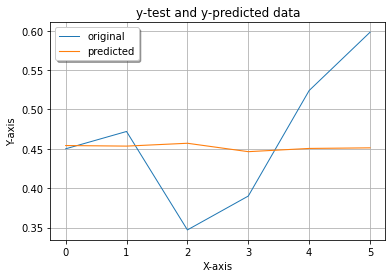

<Figure size 432x288 with 0 Axes>

In [629]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_prediction, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.savefig('WAS_graph')

# Creating the table

In [13]:
#ML_table = pd.DataFrame(columns = ['Team', 'W/L Score', 'R-squared training', 'R-squared testing', 'MSE', 'RMSE'])
#ML_table

,Team,W/L Score,R-squared training,R-squared testing,MSE,RMSE


In [602]:
# Create variables for table
MSE = mse
RMSE = mse*(1/2.0)
R_training = rfr.score(X_train_scaled, y_train)
R_test = rfr.score(X_test_scaled, y_test)
Score = y_prediction[0].round(decimals=3)
print(MSE)
print(RMSE)
print(R_training)
print(R_test)
print(Score)

0.016005864401666445
0.008002932200833222
0.8057594886855319
-0.21259299506093376
0.62


In [630]:
# Append data into table
dict = {'Team': "WAS", 'W/L Score':Score, 'R-squared training':R_training, 'R-squared testing':R_test, 'MSE':MSE, 'RMSE':RMSE}
ML_table = ML_table.append(dict, ignore_index = True)
ML_table

C:\Users\kounn\AppData\Local\Temp\ipykernel_51064\1847397641.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_table = ML_table.append(dict, ignore_index = True)


,Team,W/L Score,R-squared training,R-squared testing,MSE,RMSE
0,ATL,0.568,0.846472,0.614111,0.026773,0.013387
1,BOS,0.612,0.842763,0.653702,0.008455,0.004227
2,CHA,0.475,0.755002,0.27424,0.005586,0.002793
3,CHI,0.532,0.806667,0.640051,0.018647,0.009323
4,CLE,0.535,0.855987,0.57888,0.028194,0.014097
5,DAL,0.59,0.83378,-195.136974,0.000161,0.00008
6,DEN,0.561,0.855554,-16.74001,0.004999,0.002499
7,DET,0.626,0.877478,0.409685,0.056988,0.028494
8,GSW,0.47,0.841356,0.287293,0.044539,0.02227
9,HOU,0.577,0.818503,0.06404,0.047507,0.023754


In [327]:
pd.DataFrame.to_csv (,'C:\\Users\\kounn\\OneDrive\\Documents\\Bootcamp_Project4\\machine-learning-project-4\\data\\Prediction_Table.csv', index = False, header=True)